In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from oak_cli.utils.logging import logger
from oak_cli.evaluation.machine.main import EVALUATION_CSV

In [13]:
if not EVALUATION_CSV.exists():
    logger.error(f"{EVALUATION_CSV} does not exist yet!")
    sys.exit(1)

In [14]:
sns.set_style("whitegrid")

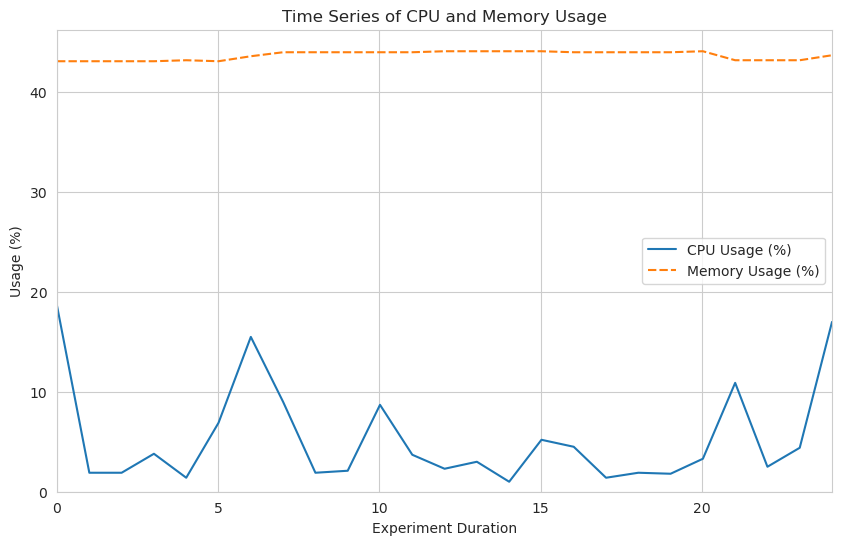

In [15]:
# Load the CSV file into a DataFrame
df = pd.read_csv(EVALUATION_CSV)

# Convert the timestamp column to datetime format
#df["Timestamp (Human Readable)"] = pd.to_datetime(df["Timestamp (Human Readable)"])

# Set the timestamp column as the index
#df.set_index("Timestamp (Unix Epoch)", inplace=True)
df.set_index("Time since experiment start", inplace=True)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=df[["CPU Usage (%)", "Memory Usage (%)"]])
plt.title("Time Series of CPU and Memory Usage")
plt.xlabel("Experiment Duration (seconds)")
plt.ylabel("Usage (%)")
# Manually set the x-axis limits to start at 0
plt.xlim([0, max(df.index)])
plt.ylim(bottom=0)
plt.show()